# Exercise 1
Construct a 1-neuron network that models the logical connective AND with two inputs.
Include a truth table and schematic sketch of your network showing the inputs, outputs,
and numerical values of your weights and biases. Show that your network correctly
models the AND connective for all possible input pairs.

# Solution to Exercise 1

## Truth Table
The truth table for the binary OR function will be as follows given that the inputs are `A` and `B`.  
| A | B | A OR B |
|---|----|--------|
| 0 | 0 |   0    |
| 0 | 1 |   1    |
| 1 | 0 |   1    |
| 1 | 1 |   1    |

### Bias term
The bias term will be -1 because we have the activation function defined as a _*unit step function*_ this means that it gives an output of 1 if the input is non-negative and 0 otherwise.  
Setting the bias term to -1 allows us to leverage the activation function and simple addition to model the truth table in a neuron

#### Illustration
##### Case 1: A = 0 and B = 0, bias = -1
```
y_hat = Network(A,B, bias) = A + B + bias = 0 + 0 - 1 = -1  
activation(y_hat) = 0
```

##### Case 2: A = 0 and B = 1, bias = -1
```
y_hat = Network(A, B, bias) = A + B + bias = 0 + 1 - 1 = 0
activation(y_hat) = 1
```

##### Case 3: A = 1 and B = 0, bias = -1
```
y_hat = Network(A, B, bias) = A + B + bias = 1 + 0 - 1 = 0
activation(y_hat) = 1
```

##### Case 4: A = 1 and B = 1, bias = -1
```
y_hat = Network(A, B, bias) = A + B + bias = 1 + 1 - 1 = 1
activation(y_hat) = 1
```

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

activation_func = lambda inp: 1 if inp >= 0 else 0
bias = -1
model = "{0} + {1} + ({2})"
activation_func_defn = "f({0}) = ({0} >= 0)? 1 : 0"

In [62]:
def or_neuron(inp_1: bool, inp_2: bool) -> int: # Set inputs to boolean to enforce 0 or 1 as input
    G = nx.DiGraph()
    _inp_1 = int(inp_1)
    _inp_2 = int(inp_2)
    _model_defn = model.format(_inp_1, _inp_2, bias)
    print(_model_defn)
    _model_output = _inp_1 + _inp_2 + bias
    output = activation_func(_model_output)
    _activation_func_defn = activation_func_defn.format(_model_output)
    edges = [
        (f"A: {_inp_1}", _model_defn),
        (f"B: {_inp_2}", _model_defn),
        (f"bias: {bias}", _model_defn),
        (_model_defn, _activation_func_defn),
        (_activation_func_defn, f"{output}")
    ]
    G.add_edges_from(edges)
    return output, G

0 + 0 + (-1)
Case 1: A = 0 and B = 0 gives us: 0


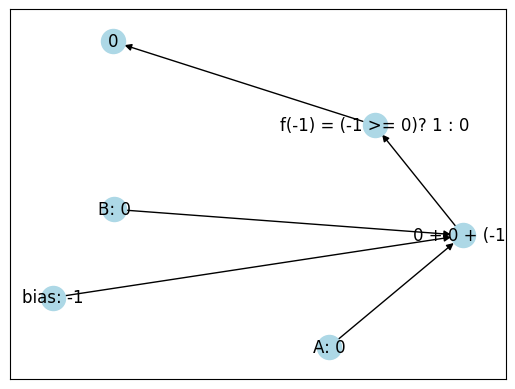

0 + 1 + (-1)
Case 1: A = 0 and B = 1 gives us: 1


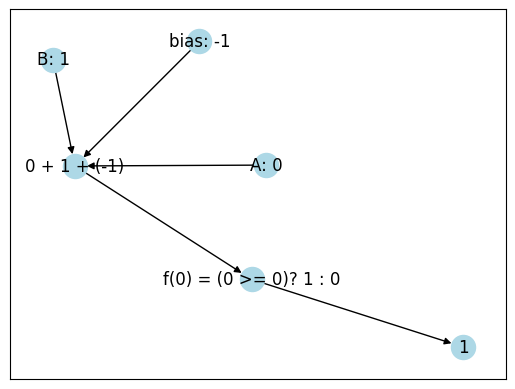

1 + 0 + (-1)
Case 1: A = 1 and B = 0 gives us: 1


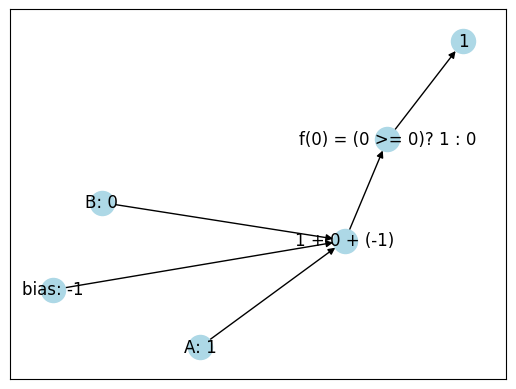

1 + 1 + (-1)
Case 1: A = 1 and B = 1 gives us: 1


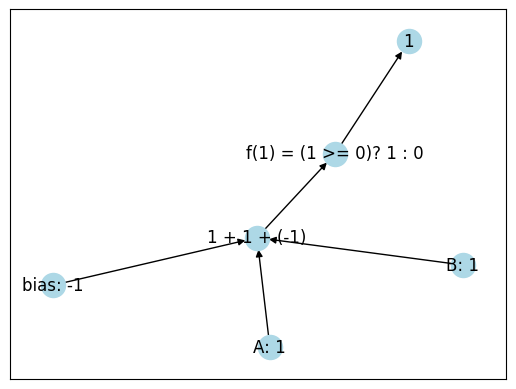

In [65]:
def test():
    plt.figure()
    output, graph = or_neuron(False, False)
    print(f"Case 1: A = 0 and B = 0 gives us: {output}")
    nx.draw_networkx(graph, with_labels = True, node_color="lightblue")
    plt.show()
    
    plt.figure()
    output, graph = or_neuron(False, True)
    print(f"Case 1: A = 0 and B = 1 gives us: {output}")
    nx.draw_networkx(graph, with_labels = True, node_color="lightblue")
    plt.show()
    
    plt.figure()
    output, graph = or_neuron(True, False)
    print(f"Case 1: A = 1 and B = 0 gives us: {output}")
    nx.draw_networkx(graph, with_labels = True, node_color="lightblue")
    plt.show()
    
    plt.figure()
    output, graph = or_neuron(True, True)
    print(f"Case 1: A = 1 and B = 1 gives us: {output}")
    nx.draw_networkx(graph, with_labels = True, node_color="lightblue")
    plt.show()
    
test()